# Analizes de sentimentos no mercado financeiro:

link do paper: https://arxiv.org/pdf/1307.5336

link do dataset: https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

## Dataset:

. The dataset provides a collection of
∼ 5000 phrases/sentences sampled from financial news texts
and company press releases, which are tagged as positive,
negative or neutral by a group of 16 annotators with adequate
business education background. 

## Paper

Thereafter, in the results and
experiments section, we perform a comparative study with a
number of baseline approaches for sentiment analysis. An
error analysis of the LPS model is also provided along with
discussions for future developments

. The authors perform a careful study to examine the quality of word
classifications given by the Harvard Dictionary
Loughran and McDonald also propose a
few other word classifications (positive, uncertain, litigious,
strong modal and weak modal), which should be considered
along with lists of negative words.

#### Pharapase do paper:

O artigo intitulado “Good Debt or Bad Debt: Detecting Semantic Orientations in Economic Texts”, escrito por Pekka Malo, Pyry Takala, Ankur Sinha, Pekka Korhonen e Jyrki Wallenius, apresenta o modelo Linearized Phrase Structure (LPS) para análise de sentimentos em textos financeiros e econômicos, com foco na classificação de frases em positivas, negativas ou neutras. Ele destaca a importância de usar léxicos específicos do domínio financeiro e combiná-los com algoritmos de aprendizado de máquina para capturar a complexidade da linguagem financeira, melhorando a precisão na análise de sentimentos em comparação com abordagens tradicionais.


## Lista de stop_words

We can solve that by using a list of stopwords. A stopword is a word that we are going to choose to ignore because it does not mean anything in our problem. These lists are usually handcrafted, and many researchers are happy to share their own lists. We can find a nice one here: https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords.

teve algumas mudanças na lista de palavras disponibilizadas

In [187]:
stop_words=["i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their",
"theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does",
"did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into",
"through","during","before","after","above","below","to","from","up","in","out","on","off","over","again","further","then","once","here","there",
"when","where","why","how","all","any","both","each","few","more","most","other","some","such","only","own","same","so","than","too",
"very","s","t","can","will","just","don","should","now","THE","A","a","the","eur","mn"]

stop_words2=["the","to","in","of","and","for","on","from","eur","mn","is","its","by","as","at","has","it","was","mln"]

# Imports


In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [173]:

df = pd.read_csv('data.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


# Pre processing steps

Remover as stopwords pode ajudar a eliminar palavras que não carregam muita informação semântica (como “a”, “the”, “is”). Isso pode melhorar a performance, mas tenha cuidado, pois algumas palavras comumente removidas podem ser relevantes para expressar sentimentos (ex.: “not”). Vou sugerir um código que inclui a remoção dessas stopwords, com atenção para manter palavras relevantes para a análise de sentimento.

removendo delas "CountVectorizer(binary=False, stopwords=stopwords) piorou a accuracia media do modelo

## Porque utilizar o MultinomialNB

O Multinomial Naive Bayes é projetado para trabalhar com dados representados por contagens ou frequências de características (como palavras) e é amplamente utilizado em tarefas de classificação de texto, incluindo análise de sentimento.
	
•	Classificação multiclasse: Como você tem três classes (positivo, negativo e neutro), o MultinomialNB lida bem com essa estrutura, porque modela a probabilidade de uma palavra ocorrer em uma determinada classe com base nas contagens das palavras em exemplos de treinamento.
	
•	Simplicidade e eficiência: É rápido de treinar, mesmo com grandes quantidades de dados, e tem uma boa performance em problemas de NLP, como classificação de sentimento.

In [182]:
from sklearn.naive_bayes import MultinomialNB
# como toda vez que roda a accuracia muda vamos reportar a média da accuracia em vez de apenas uma rodada
lista_accuracias = []
for i in range(100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Sentiment'], test_size=0.2)
    # After that, we will transform our data so that each text becomes a vector, similarly to the TFIDF vectorization process. Thus, our dataset becomes a matrix 
    #  where 
    #  is the number of documents in the dataset and 
    #  is our vocabulary size:

    # Create the pipeline
    model = Pipeline([
        ('vectorizer', CountVectorizer(binary=False, stop_words=stop_words2)),  # Use binary=False for MultinomialNB
        ('classifier', MultinomialNB())
    ])
    # Now, we use a model and fit its parameters to our data:
    # Train the pipeline
    model.fit(X_train, y_train)

    # Evaluate the pipeline ,Last, we use the model to make predictions and evaluate its accuracy:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    lista_accuracias.append(accuracy)

# Calculate mean and standard error using pandas
df_accuracies = pd.DataFrame(lista_accuracias, columns=['Accuracy'])
mean_accuracy = df_accuracies['Accuracy'].mean()
standard_deviation = df_accuracies['Accuracy'].std()
standard_error = standard_deviation / np.sqrt(len(lista_accuracias))

print(f'Media: {mean_accuracy:.2f}')
print(f'Standard Error: {standard_error:.4f}')

Media: 0.69
Standard Error: 0.0013


In [183]:
from scipy.stats import ttest_1samp

# Definindo o range de mu_b
mu_b =0.69 # valor esperado da media populacional
alpha = 0.05 #nivel de significancia para o teste


t_statistic, p_value = ttest_1samp(df_accuracies, mu_b)
print(p_value) # O valor p, que indica a probabilidade de observar um valor tão extremo quanto o calculado se a hipótese nula for verdadeira.
# e o valor p for menor que o valor de alpha (neste caso, 0,05), rejeitamos a hipótese nula de que a média da amostra é igual a 0,69.

[0.01766353]


Em resumo, o código acima está verificando se a média dos valores em df_accuracies é significativamente diferente de 0,69, com um nível de confiança de 95%. No caso como o resultado é menor que 0.05 mostra que o valor realmente esta proximo disso

# Matriz de confusão

In [184]:
from sklearn.metrics import confusion_matrix

# This block is old news
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Sentiment'], test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Print the confusion matrix - we use the dataframe so it prints nicely, but you can use
# other techniques like making a figure of simply viewing the matrix with a print() statement
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)
cm_df.head()

,negative,neutral,positive
negative,50,79,63
neutral,80,507,49
positive,10,112,219


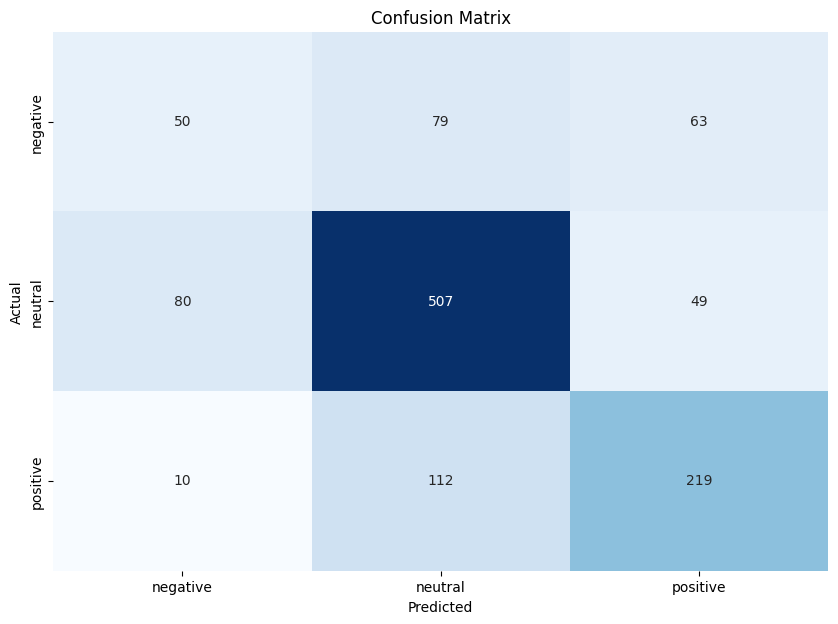

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Palavras mais importantes para a classificação



In [200]:
df = pd.read_csv('data.csv')
X = df['Sentence']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipe = Pipeline([('vectorizer', CountVectorizer(binary=False, stop_words=stop_words2)), ('classifier', MultinomialNB())])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

words = pipe['vectorizer'].get_feature_names_out()
log_probs = pipe['classifier'].feature_log_prob_
classes = pipe['classifier'].classes_

print(words)
for i, class_label in enumerate(classes):
    sorted_indices = log_probs[i].argsort()[::-1]  # Do mais importante para o menos importante
    top5words = words[sorted_indices[:5]]  # Top 5 palavras
    top5log_probs = log_probs[i][sorted_indices[:5]]  # Top 5 probabilidades
    # Converter log_probs para probabilidades
    top5probs = np.exp(top5log_probs)
    print(f'Classe: {class_label}')
    print('Top 5 palavras:', top5words)
    print('Log prob:', top5log_probs)
    print('Probabilidades:', top5probs)
    print()


# Inicializando o DataFrame
df_probs = pd.DataFrame({'Palavra': words})

# Preenchendo o DataFrame com as probabilidades para cada classe
for i, class_label in enumerate(classes):
    # Converter log_probs para probabilidades
    probs = np.exp(log_probs[i])
    df_probs[f'Prob_{class_label}'] = probs
df_probs.head(50)

df_probs['delta'] = np.abs(df_probs['Prob_positive'] - df_probs['Prob_negative'])

# Ordenar o DataFrame pelos valores de 'delta' em ordem decrescente
df_probs = df_probs.sort_values(by='delta', ascending=False)

# Exibir as primeiras linhas do DataFrame ordenado
df_probs.head(50)

0.7048759623609923
['00' '000' '000063' ... 'ñskyl' 'óeur' 'úo']
Classe: negative
Top 5 palavras: ['profit' 'down' 'sales' 'year' 'net']
Log prob: [-5.04937512 -5.37095875 -5.39421561 -5.44241771 -5.44241771]
Probabilidades: [0.00641334 0.00464967 0.00454278 0.004329   0.004329  ]

Classe: neutral
Top 5 palavras: ['will' 'company' 'be' 'with' 'finnish']
Log prob: [-4.53277758 -4.6773128  -4.94447323 -5.19133331 -5.31463153]
Probabilidades: [0.01075077 0.00930398 0.00712267 0.00556458 0.00491909]

Classe: positive
Top 5 palavras: ['with' 'sales' 'year' 'said' 'net']
Log prob: [-5.1292808  -5.14590168 -5.17999589 -5.22734201 -5.22734201]
Probabilidades: [0.00592082 0.00582322 0.00562803 0.00536777 0.00536777]



,Palavra,Prob_negative,Prob_neutral,Prob_positive,delta
2996,down,0.004650,0.001625,0.000293,0.004357
9521,up,0.001015,0.001335,0.005140,0.004125
9938,with,0.001977,0.005565,0.005921,0.003943
1064,an,0.000321,0.002983,0.002928,0.002607
7922,said,0.002833,0.004496,0.005368,0.002535
7810,rose,0.000107,0.000134,0.002635,0.002528
2701,decreased,0.002458,0.001202,0.000065,0.002393
2278,company,0.003153,0.009304,0.005270,0.002117
4714,increased,0.000428,0.000245,0.002440,0.002012
5584,long,0.000321,0.000445,0.002310,0.001989


# Analizando o tamanho do dataset

In [129]:

from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor

# Função auxiliar para calcular acurácia em uma iteração do loop interno
def calcular_acuracia(df_red):
    # Embaralha o dataframe
    df_red = df_red.sample(frac=1)
    X_train, X_test, y_train, y_test = train_test_split(df_red['Sentence'], df_red['Sentiment'], test_size=0.2)

    # Cria o pipeline de modelo
    model_lr = Pipeline([
        ('vectorizer', CountVectorizer(binary=False, stop_words=stop_words)),  # Use binary=False for MultinomialNB
        ('classifier', MultinomialNB())
    ])

    # Treina o modelo
    model_lr.fit(X_train, y_train)

    # Faz a predição e calcula a acurácia
    y_pred = model_lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    Y_train_predict = model_lr.predict(X_train)
    accuracy_train = accuracy_score(y_train, Y_train_predict)

    return accuracy, accuracy_train

# Função para calcular a acurácia média para um dado valor de 'i'
def calcular_acuracia_media(i, df):
    lista_accuracias_teste = []
    lista_accuracias_treino = []
    if i != 0:
        # conseguindo uma fracao do dataframe
        df_red = df.sample(frac=i / 100)
    else:
        i = 0.1
        df_red = df.sample(frac=i / 100)
    tamanho_treinado=len(df_red)
    # Paraleliza o loop interno com threads
    with ThreadPoolExecutor() as executor:
        resultados = list(executor.map(lambda _: calcular_acuracia(df_red), range(10)))

    for accuracy_test, accuracy_train in resultados:
        lista_accuracias_teste.append(accuracy_test)
        lista_accuracias_treino.append(accuracy_train)

    mean_accuracy_teste = pd.Series(lista_accuracias_teste).mean()
    mean_accuracy_treino = pd.Series(lista_accuracias_treino).mean()
    return mean_accuracy_teste, mean_accuracy_treino, tamanho_treinado
# Carrega o dataset
df = pd.read_csv('data.csv')

# Lista para armazenar as acurácias médias de teste e treino
lista_accuracias_medias_teste = []
lista_accuracias_medias_treino = []
lista_tamanho_treinado=[]

# Usa o ThreadPoolExecutor para rodar o loop externo em paralelo
with ThreadPoolExecutor() as executor:
    # Roda o loop externo (fração do dataframe) em paralelo
    resultados = list(executor.map(lambda i: calcular_acuracia_media(i, df), range(100)))

# Separar os resultados em acurácia de teste e treino
for accuracy_teste, accuracy_treino, tamanho_treinado in resultados:
    lista_accuracias_medias_teste.append(accuracy_teste)
    lista_accuracias_medias_treino.append(accuracy_treino)
    lista_tamanho_treinado.append(tamanho_treinado)

# Converte os resultados em DataFrame
df_accuracies_media = pd.DataFrame({
    'Accuracy_Test': lista_accuracias_medias_teste,
    'Accuracy_Train': lista_accuracias_medias_treino,
    'Data_quantity': lista_tamanho_treinado
})

# Calcula a média geral de teste e treino
mean_accuracy_media_teste = df_accuracies_media['Accuracy_Test'].mean()
mean_accuracy_media_treino = df_accuracies_media['Accuracy_Train'].mean()

# Exibe as médias
print(f'Media Teste: {mean_accuracy_media_teste:.2f}')
print(f'Media Treino: {mean_accuracy_media_treino:.2f}')

Media Teste: 0.66
Media Treino: 0.91


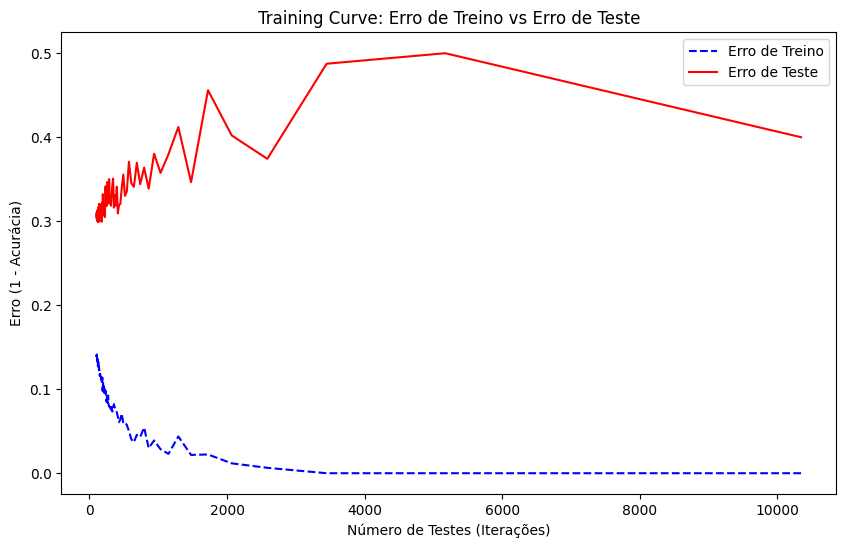

In [106]:
import matplotlib.pyplot as plt

# Calcula o erro (1 - acurácia) para treino e teste
df_accuracies_media['Error_Train'] = 1 - df_accuracies_media['Accuracy_Train']
df_accuracies_media['Error_Test'] = 1 - df_accuracies_media['Accuracy_Test']

# Gera os números de iterações (número de testes) para o eixo x
iterations = range(1, len(df_accuracies_media) + 1)
size=[10343/i for i in iterations]

# Plota a curva de erro de treino e teste
plt.figure(figsize=(10, 6))
plt.plot(size, df_accuracies_media['Error_Train'], label='Erro de Treino', color='blue', linestyle='--')
plt.plot(size, df_accuracies_media['Error_Test'], label='Erro de Teste', color='red')

# Adiciona título e rótulos aos eixos
plt.title('Training Curve: Erro de Treino vs Erro de Teste')
plt.xlabel('Número de Testes (Iterações)')
plt.ylabel('Erro (1 - Acurácia)')

# Adiciona uma legenda
plt.legend()

# Exibe o gráfico
plt.show()

Com base nessas curvas, como a accuracia do training set é diferente da accuracia do set de teste conseguimos utilizar mais dados para melhorar a accuracia do modelo.

com mais dados nos provavelmentes diminuiriamos o erro de teste

provavelmente estamos overfiiting o modelo.

# Topic analyzis

Tópicos identificados:
         00       000    000063       002      0025       003      0030  \
0  0.027399  0.285380  0.000000  0.000000  0.000853  0.001833  0.002568   
1  0.000000  0.085799  0.000000  0.000828  0.000000  0.000037  0.000000   
2  0.000000  0.000000  0.001019  0.002757  0.001903  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.001742  0.000000  0.000000   
4  0.015951  0.172683  0.003983  0.000000  0.000000  0.000000  0.000000   
5  0.001753  0.017294  0.002565  0.000000  0.000000  0.000000  0.002790   
6  0.031179  0.041791  0.000000  0.000000  0.000000  0.000000  0.000000   

        007       008        01  ...      ñnge     ñnnen      ñnsi    ñrnits  \
0  0.000000  0.000000  0.012730  ...  0.000000  0.000000  0.000000  0.000293   
1  0.005701  0.000000  0.011154  ...  0.000000  0.000000  0.000000  0.000000   
2  0.000266  0.000000  0.000000  ...  0.004562  0.017417  0.001758  0.001197   
3  0.000433  0.000000  0.000000  ...  0.004080  0.000000

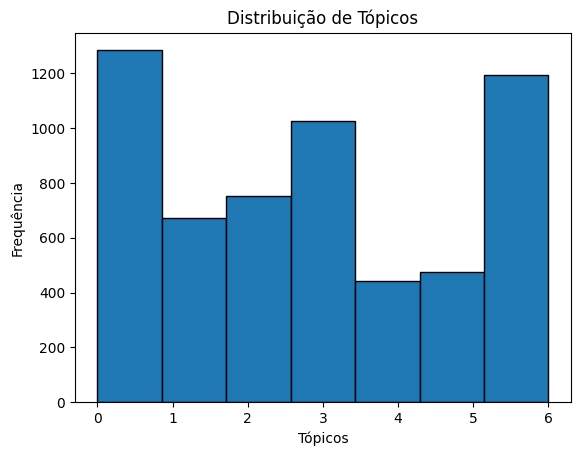

In [204]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criação da matriz de palavras
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df['Sentence'])

# Análise de tópicos usando NMF
n_topics = 7  # Aumentando o número de tópicos para 7
nmf = NMF(n_components=n_topics, random_state=42)
X_nmf = nmf.fit_transform(X)

# Criando um DataFrame para visualizar os tópicos
topic_words = nmf.components_
feature_names = vectorizer.get_feature_names_out()

topics_df = pd.DataFrame(topic_words, columns=feature_names)
print("Tópicos identificados:")
print(topics_df)

# Função para imprimir palavras em cada tópico
def print_words_in_topics(nmf, vectorizer):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(nmf.components_):
        print(f"Topic {idx}")
        for i in topic.argsort()[-5:]:
            print(words[i])
        print()

print_words_in_topics(nmf, vectorizer)

# Treinamento e Avaliação de Classificadores
lista_accuracias = []
for i in range(100):
    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.2, random_state=i)

    # Criar o pipeline para o classificador
    model = Pipeline([
        ('classifier', MultinomialNB())  # Remove o CountVectorizer aqui
    ])

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Avaliar o modelo
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    lista_accuracias.append(accuracy)

# Calcular a média e o erro padrão
df_accuracies = pd.DataFrame(lista_accuracias, columns=['Accuracy'])
mean_accuracy = df_accuracies['Accuracy'].mean()
standard_deviation = df_accuracies['Accuracy'].std()
standard_error = standard_deviation / np.sqrt(len(lista_accuracias))

print(f'Média de Acurácia: {mean_accuracy:.2f}')
print(f'Erro Padrão: {standard_error:.4f}')

# Classificador em duas camadas baseado em tópicos
# Treinando um modelo específico para cada tópico
for topic in range(n_topics):
    topic_mask = X_nmf[:, topic] > 0
    X_topic = X[topic_mask]
    y_topic = df['Sentiment'][topic_mask]

    if len(y_topic) > 0:  # Verificar se há dados suficientes para treinar
        model_topic = Pipeline([
            ('classifier', MultinomialNB())  # Remove o CountVectorizer aqui também
        ])

        # Dividir os dados em treino e teste para o tópico específico
        X_train_topic, X_test_topic, y_train_topic, y_test_topic = train_test_split(X_topic, y_topic, test_size=0.2)

        # Treinar o modelo do tópico
        model_topic.fit(X_train_topic, y_train_topic)

        # Avaliar o modelo do tópico
        y_pred_topic = model_topic.predict(X_test_topic)
        accuracy_topic = accuracy_score(y_test_topic, y_pred_topic)

        print(f'Acurácia para o Tópico {topic}: {accuracy_topic:.2f}')

# Análise da qualidade dos tópicos
topic = np.argmax(X_nmf, axis=1)
plt.hist(topic, bins=len(set(topic)), edgecolor='black')
plt.title('Distribuição de Tópicos')
plt.xlabel('Tópicos')
plt.ylabel('Frequência')
plt.show()